## Introduction<a id='introduction'></a>

**Purpose:** \
Generate relevant statistics for two sales campaigns, offering tech support and/or a discount to potential customers.

Questions to answer:
- What type of customers represent the majority of our revenue?
- What type of customers are we not targeting very well?
- What was the average revenue increase for offering tech support and for offering a discount?
- What is the most amount, on average, that can be spent on tech support before losing revenue?
- What is the maximum discount that can be offered before losing revenue?
- What type of customers are more likely to convert if offered tech support and offered a discount?

**Context:** \
A software company ran two sales campaigns, offering tech support and/or a discount to potential customers, and would like to know the impact of the campaigns on increasing the company's revenue. The company also wants to quantify the success or failure of the two campaigns and how should the company re-run the campaign(s) if it chooses to do so. 

**Data:** \
Data comes from [Kaggle](https://www.kaggle.com/datasets/hwwang98/software-usage-promotion-campaign-uplift-model)

From data card, columns are
1) Global Flag: Whether customer has global offices
2) Major Flag: Whether customer is a large customer in their industry (as opposed to small medium corporation)
3) SMC Flag: Whether customer is small medium corporation
4) Commercial Flag: Whether the customer's business is commercial as opposed to public sector
5) IT Spend: (\$) spent on IT-related purchases
6) Employee Count: Number of employees
7) PC Count: number of PCs used by the customer
8) Size: Customer's size given their yearly revenue
9) Tech Support: (treatment; binary) whether customer received tech support
10) Discount: (treatment; binary) whether customer was given a discount
11) Revenue: (outcome; \$) revenue from customer

**Outcomes from Data Wrangling:** 
1) Data is balanced with $\approx$ 500 customers for each treatment variable.
2) Data can potentially be organized into 4 clusters through K-means and according to elbow method, but silhouette score does not strongly support clustering. 
3) Raw data is clean and does not need processing.
4) IT Spend, Employee Count, PC Count, and Size are all exponentially distributed

## Contents<a id='contents'></a> 

* [Introduction](#introduction)
* [Contents](#contents)
* [Objectives](#objectives)
* [Average Gain from Tech Support and Discount](#average_gain_tech_support_discount)
* [Coarse Customer Profiling](#coarse_customer_profiling)

## Objectives <a id='objectives'></a>

Better understand our customers by answering the following questions:
- What type of customers represent the majority of our revenue?
    - Tend to be much larger companies. 
- What type of customers are we not targeting very well?
    - Can't answer directly with given data.
    - However, sales teams should focus on landing larger companies as they contribute more to revenue. 
        - They are also more likely to convert by offering tech support and a discount (sales efforts less likely to be wasted)
- What was the average revenue increase for offering tech support and for offering a discount?
    - For tech support only: 8518.22 $\pm$ 6355.26
    - For discount only: 5662.05 $\pm$ 8185.68
    - For both tech support and discount: 20198.23 $\pm$ 13536.51
- What is the most amount, on average, that can be spent on tech support before losing revenue?
    - If offered to all customers, at most can spend 12117.15 on tech support
- What is the maximum discount that can be offered before losing revenue?
    - If offered to all customers, the largest discount is 9387.25 on average
- What type of customers are more likely to convert if offered tech support and offered a discount?
    - See above

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('../data/raw/multi_attribution_sample.csv')

## Average Gain from Tech Support and Discount <a id='average_gain_tech_support_discount'></a>

In [20]:
my_bool = 0
my_array = df[df['Tech Support'] == my_bool]['Revenue']
print('mean, std revenue without tech support: {:.2f}, {:.2f}'.format(np.mean(my_array), np.std(my_array)))

mean, std revenue without tech support: 9302.99, 6372.64


In [19]:
my_bool = 1
my_array = df[df['Tech Support'] == my_bool]['Revenue']
print('mean, std revenue with tech support: {:.2f}, {:.2f}'.format(np.mean(my_array), np.std(my_array)))

mean, std revenue with tech support: 21420.14, 11841.67


In [22]:
my_bool = 0
my_array = df[df['Discount'] == my_bool]['Revenue']
print('mean, std revenue without discount: {:.2f}, {:.2f}'.format(np.mean(my_array), np.std(my_array)))

mean, std revenue without discount: 10605.73, 6146.31


In [23]:
my_bool = 1
my_array = df[df['Discount'] == my_bool]['Revenue']
print('mean, std revenue with discount: {:.2f}, {:.2f}'.format(np.mean(my_array), np.std(my_array)))

mean, std revenue with discount: 19992.98, 13047.75


In [30]:
my_bool1, my_bool2 = (0, 0)
my_array = df[(df['Tech Support'] == my_bool1) & (df['Discount'] == my_bool2)]['Revenue']
print('mean, std revenue without tech support and without discount: {:.2f}, {:.2f}'.format(np.mean(my_array), np.std(my_array)))

mean, std revenue without tech support and without discount: 6585.89, 3359.91


In [31]:
my_bool1, my_bool2 = (1, 0)
my_array = df[(df['Tech Support'] == my_bool1) & (df['Discount'] == my_bool2)]['Revenue']
print('mean, std revenue with tech support and without discount: {:.2f}, {:.2f}'.format(np.mean(my_array), np.std(my_array)))

mean, std revenue with tech support and without discount: 15104.11, 5394.47


In [32]:
my_bool1, my_bool2 = (0, 1)
my_array = df[(df['Tech Support'] == my_bool1) & (df['Discount'] == my_bool2)]['Revenue']
print('mean, std revenue without tech support and with discount: {:.2f}, {:.2f}'.format(np.mean(my_array), np.std(my_array)))

mean, std revenue without tech support and with discount: 12247.94, 7464.34


In [33]:
my_bool1, my_bool2 = (1, 1)
my_array = df[(df['Tech Support'] == my_bool1) & (df['Discount'] == my_bool2)]['Revenue']
print('mean, std revenue with tech support and with discount: {:.2f}, {:.2f}'.format(np.mean(my_array), np.std(my_array)))

mean, std revenue with tech support and with discount: 26784.12, 13112.90


In [34]:
print(15104.11 - 6585.89, np.sqrt(5394.47**2 + 3359.91**2))

8518.220000000001 6355.25780665112


In [35]:
print(12247.94 - 6585.89, np.sqrt(7464.34**2 + 3359.91**2))

5662.05 8185.6805974640865


In [36]:
print(26784.12 - 6585.89, np.sqrt(13112.90**2 + 3359.91**2))

20198.23 13536.51142717724


## Coarse Customer Profiling <a id='coarse_customer_profiling'></a>

C:\Users\kimvo\AppData\Local\Temp\ipykernel_8844\3951250099.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


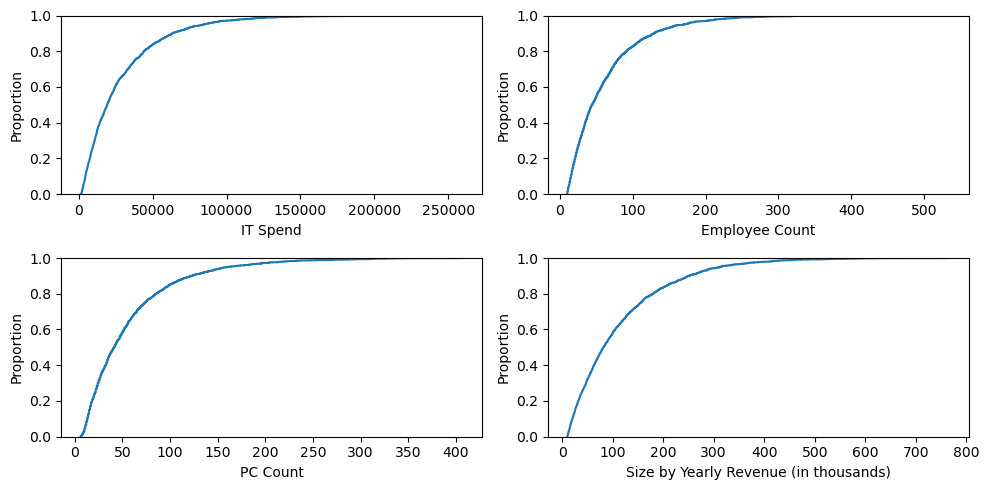

In [11]:
plt.subplots(figsize=(10,5))
plt.subplot(2,2,1)
sns.ecdfplot(data=df, x='IT Spend')
plt.subplot(2,2,2)
sns.ecdfplot(data=df, x='Employee Count')
plt.subplot(2,2,3)
sns.ecdfplot(data=df, x='PC Count')
plt.subplot(2,2,4)
sns.ecdfplot(data=df/1000, x='Size')
plt.xlabel('Size by Yearly Revenue (in thousands)')
plt.tight_layout()

In [111]:
rev_cumsum = np.cumsum(np.sort(df['Revenue']))
rev_cumsum /= 1000

In [103]:
np.sort(df['Revenue'])

array([ -616.5724513,   374.4919543,   427.6482735, ..., 70405.60593  ,
       77528.81537  , 86006.92445  ])

Text(0.5, 0, 'Revenue from Customer')

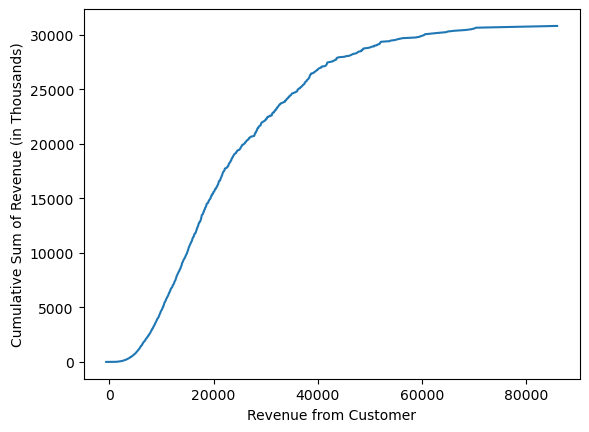

In [112]:
plt.plot(np.sort(df['Revenue']), rev_cumsum)
plt.ylabel('Cumulative Sum of Revenue (in Thousands)')
plt.xlabel('Revenue from Customer')

In [108]:
np.quantile(rev_cumsum, [0.25, 0.5, 0.75])

array([0.0791814 , 0.2404822 , 0.49686869])

Top 25% of customers contribute 50% of revenue \
(Revenue threshold for top 25% is 19666) \
Top 50% of customers contribute 75% of revenue \
(Revenue threshold for top 50% is 12597) \
Bottom 25% of customers contribute 8% of revenue \
(Revenue threshold for bottom 25% is 7548) \
Customers between 25% and 75% quantile contribute 42% of revenue \
(Revenues between 7548 and 19666)

In [118]:
# description of top 25%
df[df['Revenue'] > 19666].describe()

,Global Flag,Major Flag,SMC Flag,Commercial Flag,IT Spend,Employee Count,PC Count,Size,Tech Support,Discount,Revenue
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,0.272000,0.22400,0.474000,0.694000,59311.924000,78.74800,75.546000,236471.474000,0.84800,0.836000,30998.530583
std,0.445436,0.41734,0.499824,0.461291,34756.169255,70.55898,70.817923,111113.789979,0.35938,0.370646,10798.228235
min,0.000000,0.00000,0.000000,0.000000,2810.000000,10.00000,7.000000,15503.000000,0.00000,0.000000,19666.703390
25%,0.000000,0.00000,0.000000,0.000000,34974.000000,28.00000,25.000000,156610.000000,1.00000,1.000000,22808.162660
50%,0.000000,0.00000,0.000000,1.000000,52176.000000,58.00000,52.000000,224538.000000,1.00000,1.000000,28147.523220
75%,1.000000,0.00000,1.000000,1.000000,74844.500000,106.25000,99.000000,288459.750000,1.00000,1.000000,36389.555768
max,1.000000,1.00000,1.000000,1.000000,259808.000000,535.00000,407.000000,766485.000000,1.00000,1.000000,86006.924450


In [126]:
# percentiles for top 25%
print('Percentile of IT Spend : {:.2f}'.format(stats.percentileofscore(df['IT Spend'], 59312)))
print('Percentile of Employee Count : {:.2f}'.format(stats.percentileofscore(df['Employee Count'], 78.75)))
print('Percentile of PC Count : {:.2f}'.format(stats.percentileofscore(df['PC Count'], 75.55)))
print('Percentile of Size : {:.2f}'.format(stats.percentileofscore(df['Size'], 236471)))

Percentile of IT Spend : 88.00
Percentile of Employee Count : 74.70
Percentile of PC Count : 75.95
Percentile of Size : 88.05


In [129]:
# description of top 50%
df[df['Revenue'] > 12597].describe()

,Global Flag,Major Flag,SMC Flag,Commercial Flag,IT Spend,Employee Count,PC Count,Size,Tech Support,Discount,Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.265000,0.238000,0.470000,0.701000,42250.272000,73.314000,69.898000,169581.504000,0.789000,0.678000,23396.283653
std,0.441554,0.426072,0.499349,0.458049,32416.270157,63.283728,63.449077,110575.977529,0.408223,0.467477,10868.077288
min,0.000000,0.000000,0.000000,0.000000,1855.000000,10.000000,6.000000,10540.000000,0.000000,0.000000,12597.961290
25%,0.000000,0.000000,0.000000,0.000000,19408.000000,27.750000,25.000000,89125.000000,1.000000,0.000000,15668.741255
50%,0.000000,0.000000,0.000000,1.000000,34754.500000,54.000000,49.000000,147480.500000,1.000000,1.000000,19664.220780
75%,1.000000,0.000000,1.000000,1.000000,56033.500000,99.000000,94.000000,228267.250000,1.000000,1.000000,28147.140180
max,1.000000,1.000000,1.000000,1.000000,259808.000000,535.000000,407.000000,766485.000000,1.000000,1.000000,86006.924450


In [128]:
# percentiles for top 50%
print('Percentile of IT Spend : {:.2f}'.format(stats.percentileofscore(df['IT Spend'], 42250.3)))
print('Percentile of Employee Count : {:.2f}'.format(stats.percentileofscore(df['Employee Count'], 73.31)))
print('Percentile of PC Count : {:.2f}'.format(stats.percentileofscore(df['PC Count'], 69.9)))
print('Percentile of Size : {:.2f}'.format(stats.percentileofscore(df['Size'], 169581.5)))

Percentile of IT Spend : 78.20
Percentile of Employee Count : 71.55
Percentile of PC Count : 73.00
Percentile of Size : 78.30


In [132]:
# description of bottom 50%
df[df['Revenue'] < 12597].describe()

,Global Flag,Major Flag,SMC Flag,Commercial Flag,IT Spend,Employee Count,PC Count,Size,Tech Support,Discount,Revenue
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.13900,0.152000,0.539000,0.681000,14295.134000,48.916000,44.793000,56736.736000,0.217000,0.343000,7399.551190
std,0.34612,0.359201,0.498726,0.466322,12252.804988,37.601101,35.357634,42506.569675,0.412409,0.474949,2984.553861
min,0.00000,0.000000,0.000000,0.000000,1161.000000,10.000000,6.000000,10101.000000,0.000000,0.000000,-616.572451
25%,0.00000,0.000000,0.000000,0.000000,5642.750000,21.750000,19.000000,24525.000000,0.000000,0.000000,5131.940688
50%,0.00000,0.000000,1.000000,1.000000,10928.000000,38.000000,35.000000,46666.500000,0.000000,0.000000,7542.022624
75%,0.00000,0.000000,1.000000,1.000000,19088.000000,66.000000,59.000000,76749.500000,0.000000,1.000000,9856.465028
max,1.00000,1.000000,1.000000,1.000000,88324.000000,279.000000,267.000000,326943.000000,1.000000,1.000000,12566.931590


In [130]:
# description of bottom 25%
df[df['Revenue'] < 7548].describe()

,Global Flag,Major Flag,SMC Flag,Commercial Flag,IT Spend,Employee Count,PC Count,Size,Tech Support,Discount,Revenue
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.052000,0.116000,0.536000,0.658000,11799.978000,41.990000,37.838000,48010.992000,0.038000,0.288000,4865.592306
std,0.222249,0.320546,0.499202,0.474855,10195.475116,28.643862,26.854163,37369.678343,0.191388,0.453285,1720.109607
min,0.000000,0.000000,0.000000,0.000000,1161.000000,10.000000,6.000000,10101.000000,0.000000,0.000000,-616.572451
25%,0.000000,0.000000,0.000000,0.000000,4548.250000,20.000000,17.000000,20185.250000,0.000000,0.000000,3669.258562
50%,0.000000,0.000000,1.000000,1.000000,8903.500000,33.000000,31.000000,35385.500000,0.000000,0.000000,5129.683060
75%,0.000000,0.000000,1.000000,1.000000,15154.000000,59.000000,52.000000,63562.750000,0.000000,1.000000,6279.464077
max,1.000000,1.000000,1.000000,1.000000,73202.000000,173.000000,183.000000,252970.000000,1.000000,1.000000,7535.963856


In [131]:
# percentiles for bottom 50%
print('Percentile of IT Spend : {:.2f}'.format(stats.percentileofscore(df['IT Spend'], 11799.98)))
print('Percentile of Employee Count : {:.2f}'.format(stats.percentileofscore(df['Employee Count'], 42)))
print('Percentile of PC Count : {:.2f}'.format(stats.percentileofscore(df['PC Count'], 37.8)))
print('Percentile of Size : {:.2f}'.format(stats.percentileofscore(df['Size'], 48011)))

Percentile of IT Spend : 33.40
Percentile of Employee Count : 48.38
Percentile of PC Count : 46.75
Percentile of Size : 30.75
